In [2]:
#Importing the required Dependencies

import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importing the csv files
csvpath= os.path.join("confirmed_global.csv")
csv_file = os.path.join("confirmed_US.csv")

In [4]:
#Reading the csv file
cases_df = pd.read_csv(csvpath, encoding="utf-8" )
confirmed_df = pd.read_csv(csv_file, encoding="utf-8")

In [5]:
#Picking up the required column from the dataset
new_cases_df = cases_df[["Country/Region", "10/30/20"]]

#Renaming the columns for better understanding
renamed_cases = new_cases_df.rename(columns={"Country/Region" : "Country",
                                        "10/30/20" : "Total Cases"})
renamed_cases= renamed_cases.groupby(["Country"])

#Summing up the total cases and sorting them by descending order to find the top 10 countries with the highest number of COVID cases as of October 2020
summary_df = pd.DataFrame({"Total Cases" : renamed_cases["Total Cases"].sum()})
summary_df = summary_df.sort_values(["Total Cases"], ascending= False)
top_ten_df = summary_df.head(10)

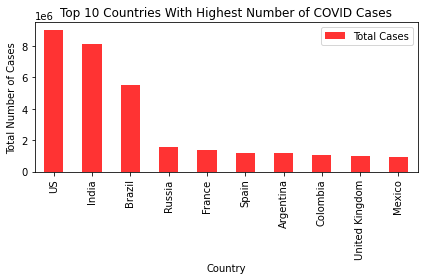

In [21]:
#Plotting the top 10 countries with the highest number of case count
top_ten_df.plot(kind="bar", color = "red", alpha = 0.8, figsize = (6,4))
plt.xlabel("Country")
plt.ylabel("Total Number of Cases")
plt.title("Top 10 Countries With Highest Number of COVID Cases")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("../Output/Top 10 Countries With Highest Number of COVID Cases.png")
plt.show()

In [9]:
#Getting Canada case count data from the dataset
new_cases_df = cases_df[["Country/Region", "3/31/20", "4/30/20", "5/31/20", "6/30/20","7/31/20","8/31/20","9/30/20", "10/30/20"]]
canada_df= new_cases_df.loc[new_cases_df["Country/Region"] == "Canada"]
#Grouping the Column by State and getting a count of the Total Number of Cases 
canada_casecount = canada_df.groupby(["Country/Region"]).sum()

#Getting US case count data from the dataset
new_confirmed_df = confirmed_df[["Country_Region", "3/31/20", "4/30/20", "5/31/20", "6/30/20","7/31/20","8/31/20","9/30/20", "10/30/20"]]
#Grouping the Column by State and getting a count of the Total Number of Cases 
us_casecount = new_confirmed_df.groupby(["Country_Region"]).sum()

In [12]:
#Merging the two Dataframes
merged_df = pd.concat([canada_casecount, us_casecount])

#Transposing the marged_df to get the countires as our columns
merged_transpose = merged_df.transpose()
merged_transpose

,Canada,US
3/31/20,8527,192101
4/30/20,54457,1076694
5/31/20,92479,1796670
6/30/20,106097,2634076
7/31/20,118281,4560437
8/31/20,130918,6029571
9/30/20,161107,7234242
10/30/20,234939,9044255


In [13]:
#Resetting the index and renaming it
reset_index = merged_transpose.reset_index()
renamed_df = reset_index.rename(columns= {"index" : "Month"})
renamed_df

,Month,Canada,US
0,3/31/20,8527,192101
1,4/30/20,54457,1076694
2,5/31/20,92479,1796670
3,6/30/20,106097,2634076
4,7/31/20,118281,4560437
5,8/31/20,130918,6029571
6,9/30/20,161107,7234242
7,10/30/20,234939,9044255


In [14]:
#Total population of Canada and US as of October 2020 from Worldometers.info
population_canada = 37858112
population_us = 331685117

#Calculating the COVID cases for Canada as a percentage of its total population
canada_population = ((merged_transpose["Canada"].div(population_canada))*100).to_frame()
canada_index = canada_population.reset_index()
canada_rename = canada_index.rename(columns={"index" : "Month"})

#Calculating the COVID cases for US as a percentage of its total population
us_population = ((merged_transpose["US"].div(population_us))*100).to_frame()
us_index = us_population.reset_index()
us_rename = us_index.rename(columns={"index" : "Month"})

In [15]:
#Merging the tow Dataframe for plotting
merged_population = pd.merge(canada_rename, us_rename, on="Month")
merged_population

,Month,Canada,US
0,3/31/20,0.022524,0.057917
1,4/30/20,0.143845,0.324613
2,5/31/20,0.244278,0.541679
3,6/30/20,0.280249,0.794150
4,7/31/20,0.312432,1.374930
5,8/31/20,0.345812,1.817860
6,9/30/20,0.425555,2.181057
7,10/30/20,0.620578,2.726759


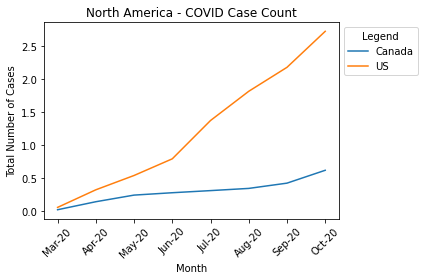

In [22]:
#Plot the covid case count from Mar 2020 to October 2020 for Canada and US
merged_population.plot()
plt.title("North America - COVID Case Count")
x_ticks=np.arange(len(merged_population["Month"]))
plt.xticks(x_ticks, ["Mar-20", "Apr-20", "May-20", "Jun-20", "Jul-20", "Aug-20", "Sep-20", "Oct-20"], rotation=45)
plt.ylabel("Total Number of Cases")
plt.xlabel("Month")
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("../Output/North America - COVID Case Count.png")
plt.tight_layout()

# Observations
* US has the highest number of COVID Cases globally. 
* California issues the first order in mid_March for citizens to avoid non-essential outdoor activities in mid-March.
* Chicago was the next to issue lockdown on March 21st by closing all public facilities.
* March 17th Doug Ford declared an emergency and ordered a wide range of closures and other restrictions aiming to limit the spread of the virus
* Trudeau announced that new entry restrictions would be implemented shortly after midnight ET on March 18, restricting entry into the country to Canadian citizens and permanent residents and their immediate families.
* Canada has seen an increase in the case count from Sept to Oct which marks the beginning of phase 2. Restrictions have been imposed again with limitations on large gatherings indoors and in public places.